In [164]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [165]:
# Load Dataset
df = pd.read_csv("titanic.csv")

In [166]:
#Printing first few rows
print(df.head())

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


In [167]:
#Printing rows x columns
print(df.shape)

(891, 12)


In [168]:
# Check data types and non-null count
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


In [169]:
# Summary stats for numerical columns 
print(df.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   891.000000  891.000000  891.000000  714.000000  891.000000   
mean    446.000000    0.383838    2.308642   29.699118    0.523008   
std     257.353842    0.486592    0.836071   14.526497    1.102743   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     223.500000    0.000000    2.000000   20.125000    0.000000   
50%     446.000000    0.000000    3.000000   28.000000    0.000000   
75%     668.500000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    8.000000   

            Parch        Fare  
count  891.000000  891.000000  
mean     0.381594   32.204208  
std      0.806057   49.693429  
min      0.000000    0.000000  
25%      0.000000    7.910400  
50%      0.000000   14.454200  
75%      0.000000   31.000000  
max      6.000000  512.329200  


In [170]:
#Missing values per column
print(df.isna().sum().sort_values(ascending=False))

Cabin          687
Age            177
Embarked         2
PassengerId      0
Name             0
Pclass           0
Survived         0
Sex              0
Parch            0
SibSp            0
Fare             0
Ticket           0
dtype: int64


In [171]:
# Numeric VS Categorical Columns
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = [c for c in df.columns if c not in numeric_cols]

In [172]:
print("Numeric columns:", len(numeric_cols), numeric_cols)
print("Categorical columns:", (len(categorical_cols)), categorical_cols)

Numeric columns: 7 ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']
Categorical columns: 5 ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']


In [173]:
##Descriptive Stats ('count','mean','std','min','median','max')
desc = df[numeric_cols].agg(['count','mean','std','min','median','max']).T
desc

,count,mean,std,min,median,max
PassengerId,891.0,446.000000,257.353842,1.00,446.0000,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,1.0000
Pclass,891.0,2.308642,0.836071,1.00,3.0000,3.0000
Age,714.0,29.699118,14.526497,0.42,28.0000,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,6.0000
Fare,891.0,32.204208,49.693429,0.00,14.4542,512.3292


In [174]:
# pick numeric columns only
numeric_cols = df.select_dtypes(include="number").columns.tolist()

rows = []
# Loop through each numeric column to calculate IQR and count outliers based on 1.5×IQR rule
for col in numeric_cols:
    s = df[col].dropna()
    q = s.quantile([0.25, 0.75])
    q1, q3 = q.loc[0.25], q.loc[0.75]
    iqr = q3 - q1
    lower, upper = q1 - 1.5*iqr, q3 + 1.5*iqr
    outliers = s[(s < lower) | (s > upper)]
    rows.append({
        "column": col,
        "count_outliers": int(outliers.shape[0]),
        "lower_bound": lower,
        "upper_bound": upper,
        "min_val": s.min(),
        "max_val": s.max()
    })

# build and view the summary once
outlier_summary = pd.DataFrame(rows).sort_values("count_outliers", ascending=False)
outlier_summary


,column,count_outliers,lower_bound,upper_bound,min_val,max_val
5,Parch,213,0.0000,0.0000,0.00,6.0000
6,Fare,116,-26.7240,65.6344,0.00,512.3292
4,SibSp,46,-1.5000,2.5000,0.00,8.0000
3,Age,11,-6.6875,64.8125,0.42,80.0000
2,Pclass,0,0.5000,4.5000,1.00,3.0000
0,PassengerId,0,-444.0000,1336.0000,1.00,891.0000
1,Survived,0,-1.5000,2.5000,0.00,1.0000


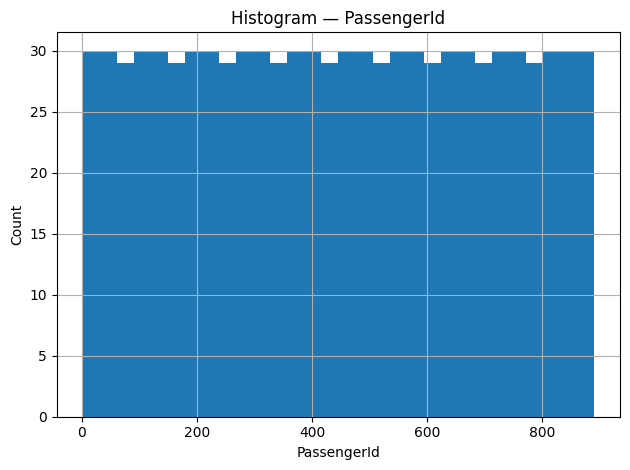

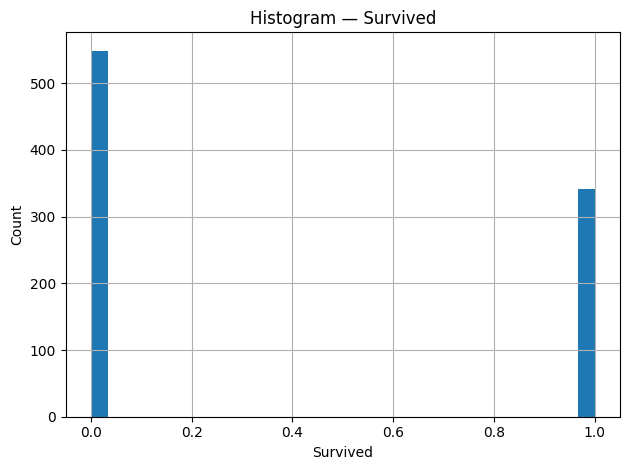

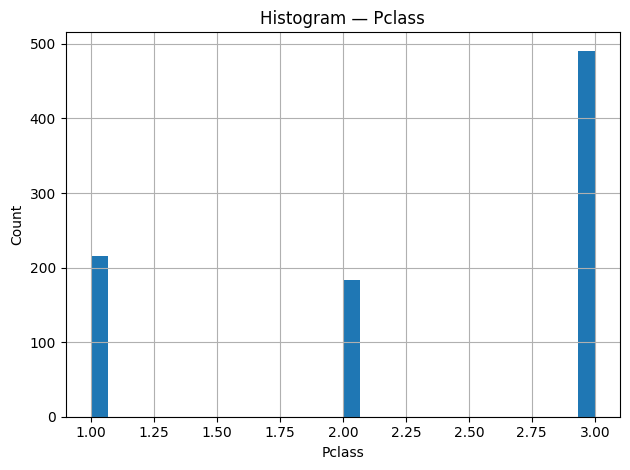

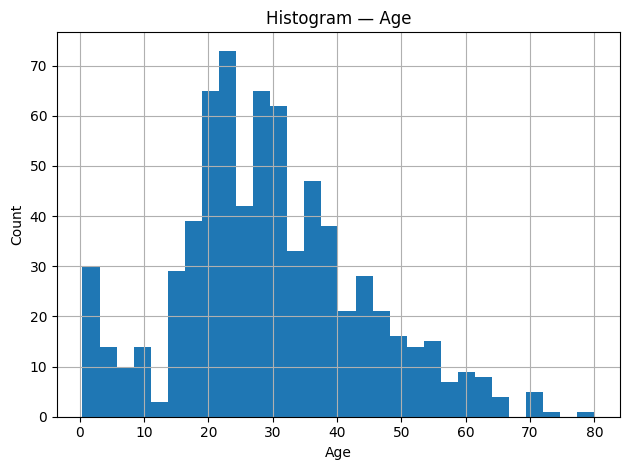

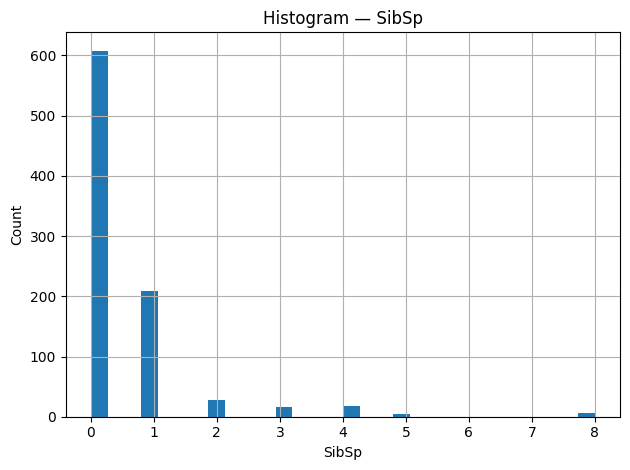

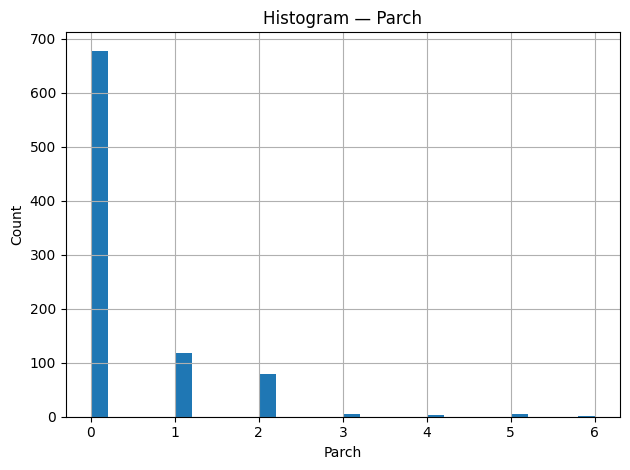

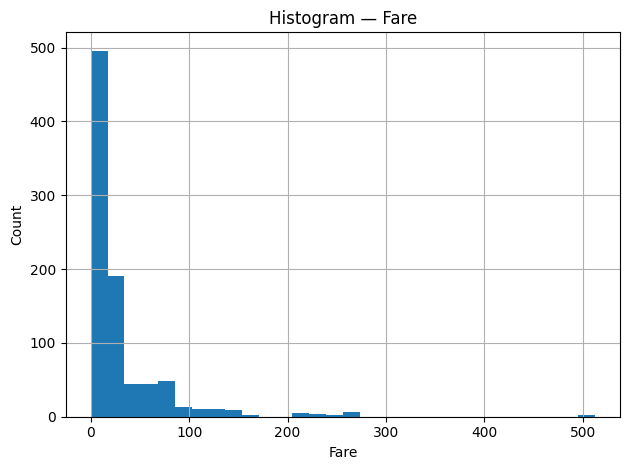

In [197]:
for col in numeric_cols:
    plt.figure()
    df[col].dropna().hist(bins=30)
    plt.title(f"Histogram — {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.tight_layout()
    plt.show()


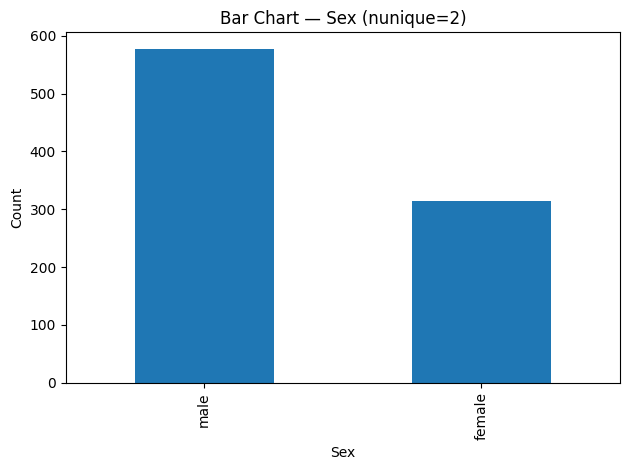

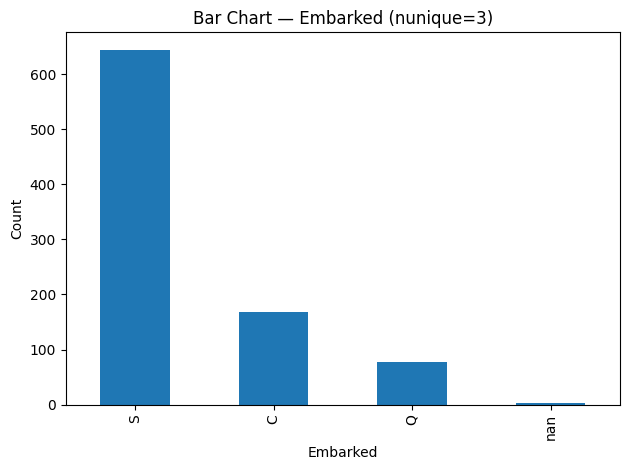

In [176]:
# Bar charts for categorical variables with reasonable cardinality
for col in categorical_cols:
    nunique = df[col].nunique(dropna=True)
    if nunique <= 20:
        plt.figure()
        df[col].astype(str).value_counts(dropna=False).plot(kind='bar')
        plt.title(f"Bar Chart — {col} (nunique={nunique})")
        plt.xlabel(col)
        plt.ylabel("Count")
        plt.tight_layout()
        plt.show()

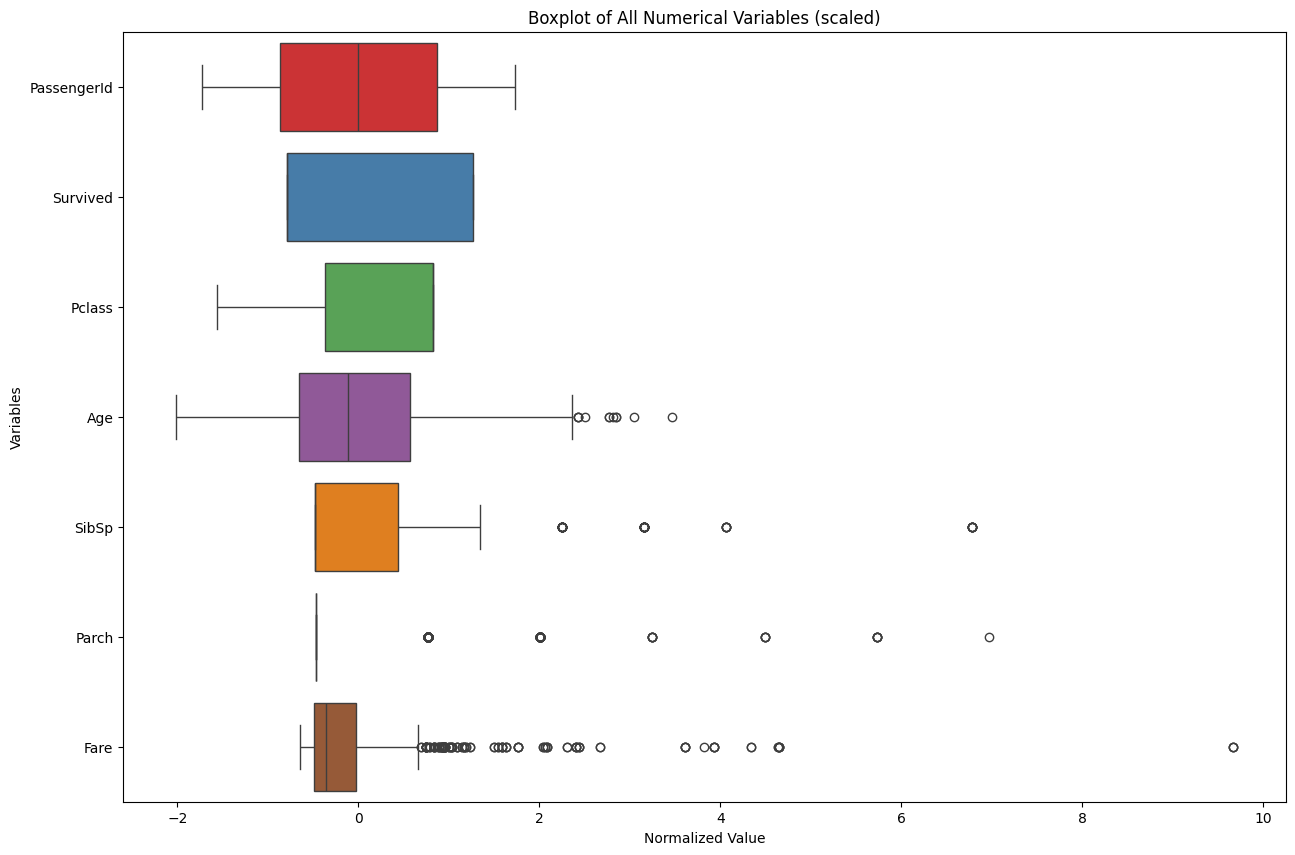

In [193]:
# standardize the data
scaled_df = (df[numeric_cols] - df[numeric_cols].mean()) / df[numeric_cols].std()

# plot the scaled data
plt.figure(figsize=(15, 10))
sns.boxplot(data=scaled_df, orient="h", palette="Set1")
plt.title('Boxplot of All Numerical Variables (scaled)')
plt.xlabel('Normalized Value')
plt.ylabel('Variables')
plt.show()

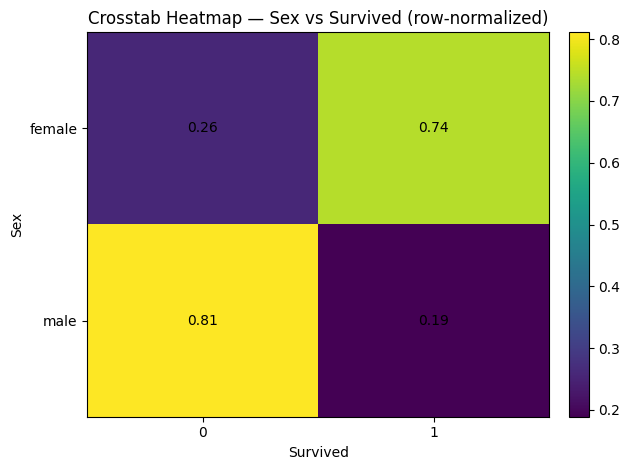

In [146]:
# Heatmap Sex vs Survived
ct1 = pd.crosstab(df['Sex'], df['Survived'], normalize='index')

fig, ax = plt.subplots()
im = ax.imshow(ct1.values, aspect='auto')
ax.set_xticks(range(ct1.shape[1]))
ax.set_yticks(range(ct1.shape[0]))
ax.set_xticklabels(ct1.columns.astype(str))
ax.set_yticklabels(ct1.index.astype(str))
ax.set_xlabel("Survived")
ax.set_ylabel("Sex")
ax.set_title("Crosstab Heatmap — Sex vs Survived (row-normalized)")

# Annotate the cells
for i in range(ct1.shape[0]):
    for j in range(ct1.shape[1]):
        ax.text(j, i, f"{ct1.values[i, j]:.2f}", ha='center', va='center')

fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
plt.tight_layout()
plt.show()

,mean_fare
Pclass,
1,84.154687
2,20.662183
3,13.675550


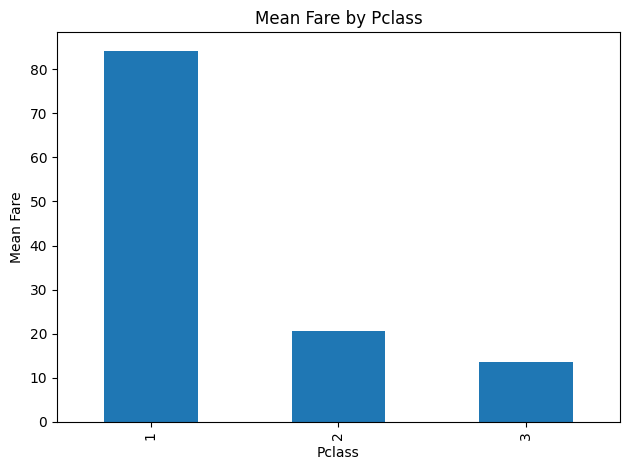

,mean_age
Sex,
female,27.915709
male,30.726645


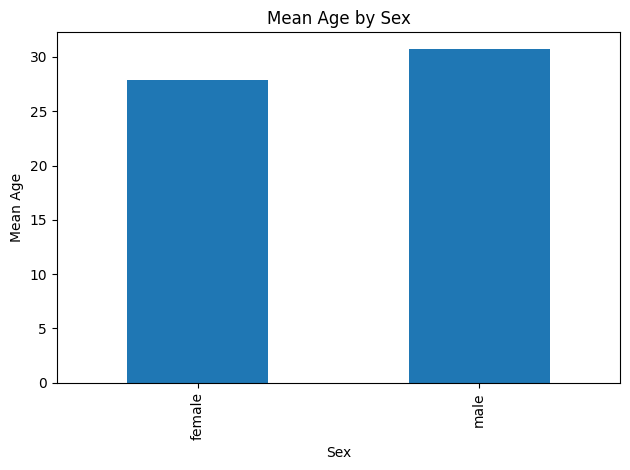

In [195]:
# Compute and display the mean fare for each passenger class, then visualize it as a bar chart
mean_fare_by_pclass = df.groupby('Pclass')['Fare'].mean().sort_index()
display(mean_fare_by_pclass.to_frame('mean_fare'))
plt.figure()
mean_fare_by_pclass.plot(kind='bar')
plt.title("Mean Fare by Pclass")
plt.xlabel("Pclass")
plt.ylabel("Mean Fare")
plt.tight_layout()
plt.show()


# Compute and display the mean age for each sex category, then visualize it as a bar chart
mean_age_by_sex = df.groupby('Sex')['Age'].mean().sort_index()
display(mean_age_by_sex.to_frame('mean_age'))
plt.figure()
mean_age_by_sex.plot(kind='bar')
plt.title("Mean Age by Sex")
plt.xlabel("Sex")
plt.ylabel("Mean Age")
plt.tight_layout()
plt.show()

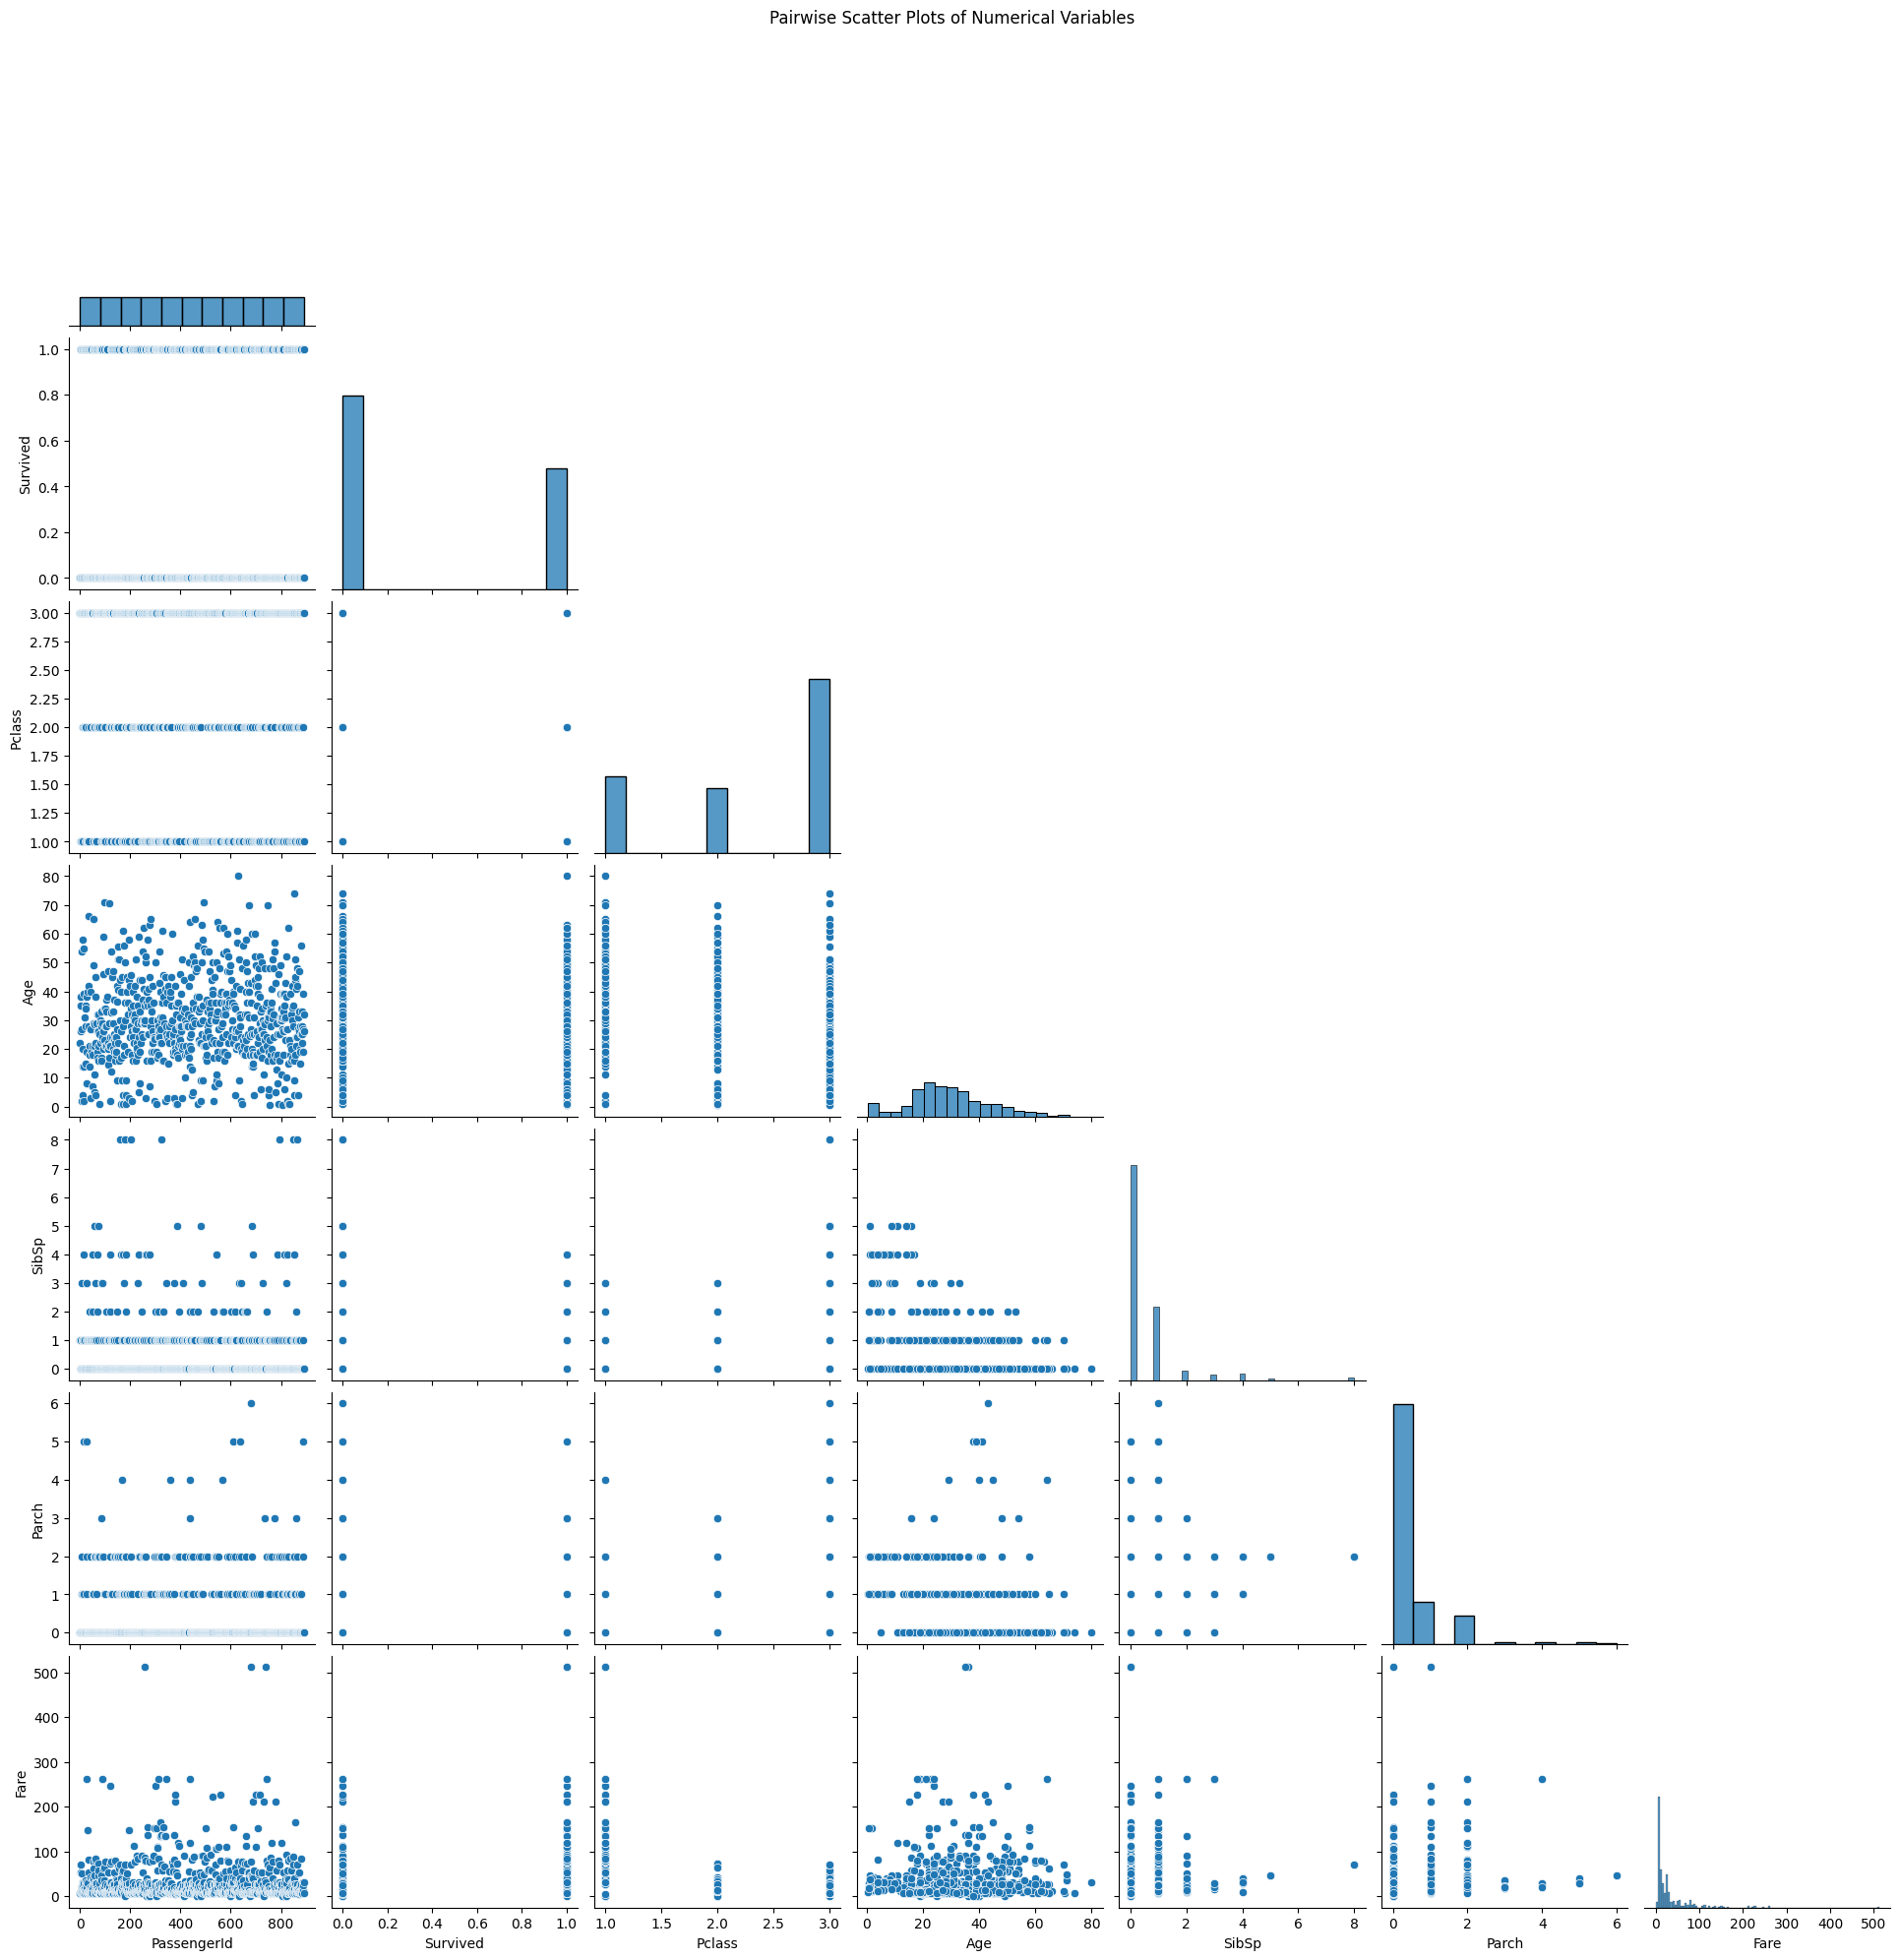

In [150]:
# Create a matrix of scatter plots to visualize pairwise relationships among all numerical variables
sns.pairplot(df[numeric_cols], corner=True, height=2.8, diag_kind="hist")
plt.suptitle("Pairwise Scatter Plots of Numerical Variables", y=1.02)
plt.show()